In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris
!pip install pyreadstat
import pyreadstat

In [36]:
file_path = "discrim.sav"  # Substitua pelo caminho real
df, meta = pyreadstat.read_sav(file_path)

In [37]:
meta

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [39]:
X = df[['outdoor', 'conservative', 'social']]  # Os dados estão no df


In [40]:
y = df['job'] 

In [41]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred = lda.predict(X_test)

# Avaliação
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Acurácia: 0.78
              precision    recall  f1-score   support

         1.0       0.87      0.68      0.76        19
         2.0       0.65      0.89      0.76        19
         3.0       1.00      0.73      0.84        11

    accuracy                           0.78        49
   macro avg       0.84      0.77      0.79        49
weighted avg       0.81      0.78      0.78        49



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

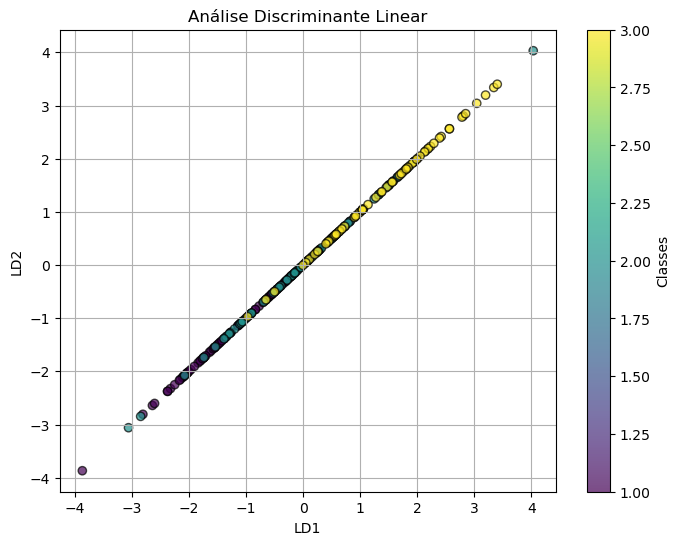

In [55]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 0], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("LD1")  # Primeiro componente discriminante
plt.ylabel("LD2")  # Segundo componente discriminante (se existir)
plt.title("Análise Discriminante Linear")
plt.colorbar(label="Classes")
plt.grid(True)
plt.show()

               outdoor    social  conservative       job       jid
outdoor       1.000000 -0.071303      0.079381  0.283070  0.124853
social       -0.071303  1.000000     -0.235865 -0.618670  0.028554
conservative  0.079381 -0.235865      1.000000  0.433873 -0.097532
job           0.283070 -0.618670      0.433873  1.000000 -0.136897
jid           0.124853  0.028554     -0.097532 -0.136897  1.000000


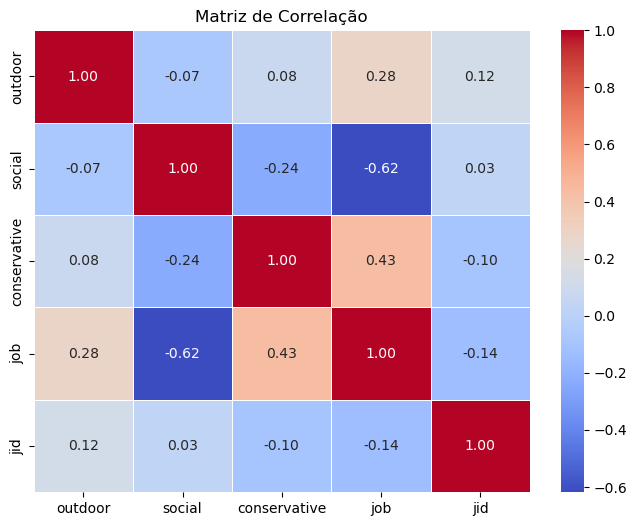

In [45]:
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo o arquivo .sav
file_path = "discrim.sav"  # Substitua pelo caminho correto
df, meta = pyreadstat.read_sav(file_path)

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

# Criando um heatmap para melhor visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


In [46]:
import pyreadstat
import pandas as pd

# Lendo o arquivo .sav
file_path = "discrim.sav"  # Substitua pelo caminho correto
df, meta = pyreadstat.read_sav(file_path)

# Estatística descritiva das variáveis numéricas
descriptive_stats = df.describe()

# Exibir a estatística descritiva
print(descriptive_stats)


          outdoor      social  conservative         job         jid
count  244.000000  244.000000    244.000000  244.000000  244.000000
mean    15.639344   20.676230     10.590164    1.922131   41.954918
std      4.839933    5.479262      3.726789    0.784417   24.789028
min      0.000000    7.000000      0.000000    1.000000    1.000000
25%     13.000000   17.000000      8.000000    1.000000   21.000000
50%     16.000000   21.000000     11.000000    2.000000   41.000000
75%     19.000000   25.000000     13.000000    3.000000   61.250000
max     28.000000   35.000000     20.000000    3.000000   93.000000


In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pyreadstat

# Lendo o arquivo .sav
file_path = "discrim.sav"
df, meta = pyreadstat.read_sav(file_path)

# Definindo variáveis independentes e dependente
X = df[['outdoor', 'conservative', 'social']]
y = df['job']

# Treinando o modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Obtendo os autovalores (eigenvalues) corretamente
eigenvalues = lda.explained_variance_ratio_

print("Autovalores (Eigenvalues):")
print(eigenvalues)


Autovalores (Eigenvalues):
[0.77123724 0.22876276]


In [53]:
import scipy.stats as stats

# Wilks' Lambda = produto (1 / (1 + autovalores))
wilks_lambda = np.prod(1 / (1 + eigenvalues))

# Cálculo do F-valor e p-valor aproximado
num_classes = len(np.unique(y))
num_features = X.shape[1]
df1 = num_classes - 1
df2 = X.shape[0] - num_classes

F_value = (1 - wilks_lambda) / wilks_lambda * (df2 / df1)
p_value = 1 - stats.f.cdf(F_value, df1, df2)

print(f"Wilks' Lambda: {wilks_lambda:.4f}")
print(f"F-Valor: {F_value:.4f}")
print(f"P-Valor: {p_value:.4f}")


Wilks' Lambda: 0.4595
F-Valor: 141.7599
P-Valor: 0.0000
